<a href="https://colab.research.google.com/github/catcarroll98/skills-assessment-2/blob/main/skillspresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import IPython.display as IPD

In [8]:
#Reading the CSV files of Author, Articles and Paper counts

article_df = pd.read_csv('/content/articles.HLA-A.csv')
author_df = pd.read_csv('/content/authors.HLA-A.csv')
paper_counts_df = pd.read_csv('/content/paper_counts.csv')

In [9]:
IPD.display(article_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10551415,Role of anchor residues in peptide binding to ...,To investigate the role of anchor residues in ...,0001-2815,Tissue antigens,(54) 325-32,1999,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ..."
1,10551419,"Characterisation of a novel HLA-A pseudogene, ...",During the development of an HLA-A polymerase ...,0001-2815,Tissue antigens,(54) 360-9,1999,F,Williams,F,Northern Ireland Regional Histocompatibility a...
2,10551420,Identification of 4 different alternatively sp...,During the development of a sequencing based t...,0001-2815,Tissue antigens,(54) 370-8,1999,L,Norgaard,L,"Department of Clinical Immunology, University ..."
3,10551424,HLA-A typing by reference strand-mediated conf...,HLA typing of class I loci by reference strand...,0001-2815,Tissue antigens,(54) 400-4,1999,D M,Turner,DM,Department of Histocompatibility and Immunogen...
4,10551426,"The HLA dictionary 1999: a summary of HLA-A, -...",This report presents serologic equivalents of ...,0001-2815,Tissue antigens,(54) 409-37,1999,G M,Schreuder,GM,"World Marrow Donor Association, Leiden, The Ne..."
...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian..."
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ..."
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T..."
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad..."


In [10]:
# Extract the initial from the 'Forename' column
article_df['FirstAuthorInitials'] =article_df['FirstAuthorForename'].apply(lambda x: x[0] if pd.notnull(x) else '')
article_df

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10551415,Role of anchor residues in peptide binding to ...,To investigate the role of anchor residues in ...,0001-2815,Tissue antigens,(54) 325-32,1999,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ..."
1,10551419,"Characterisation of a novel HLA-A pseudogene, ...",During the development of an HLA-A polymerase ...,0001-2815,Tissue antigens,(54) 360-9,1999,F,Williams,F,Northern Ireland Regional Histocompatibility a...
2,10551420,Identification of 4 different alternatively sp...,During the development of a sequencing based t...,0001-2815,Tissue antigens,(54) 370-8,1999,L,Norgaard,L,"Department of Clinical Immunology, University ..."
3,10551424,HLA-A typing by reference strand-mediated conf...,HLA typing of class I loci by reference strand...,0001-2815,Tissue antigens,(54) 400-4,1999,D M,Turner,D,Department of Histocompatibility and Immunogen...
4,10551426,"The HLA dictionary 1999: a summary of HLA-A, -...",This report presents serologic equivalents of ...,0001-2815,Tissue antigens,(54) 409-37,1999,G M,Schreuder,G,"World Marrow Donor Association, Leiden, The Ne..."
...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian..."
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ..."
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T..."
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad..."


In [11]:
#Adding the FullName column for the missing values count and for the further analysing purpose because this dataframe has so many similar Lastnames.

article_df['FullName_1'] = article_df['FirstAuthorForename'].astype(str) + ' ' + article_df['FirstAuthorLastname'].astype(str) + ' ' + article_df['FirstAuthorInitials'].astype(str)

# Displaying the Dataframe with the FullName column
IPD.display(article_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
0,10551415,Role of anchor residues in peptide binding to ...,To investigate the role of anchor residues in ...,0001-2815,Tissue antigens,(54) 325-32,1999,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada N
1,10551419,"Characterisation of a novel HLA-A pseudogene, ...",During the development of an HLA-A polymerase ...,0001-2815,Tissue antigens,(54) 360-9,1999,F,Williams,F,Northern Ireland Regional Histocompatibility a...,F Williams F
2,10551420,Identification of 4 different alternatively sp...,During the development of a sequencing based t...,0001-2815,Tissue antigens,(54) 370-8,1999,L,Norgaard,L,"Department of Clinical Immunology, University ...",L Norgaard L
3,10551424,HLA-A typing by reference strand-mediated conf...,HLA typing of class I loci by reference strand...,0001-2815,Tissue antigens,(54) 400-4,1999,D M,Turner,D,Department of Histocompatibility and Immunogen...,D M Turner D
4,10551426,"The HLA dictionary 1999: a summary of HLA-A, -...",This report presents serologic equivalents of ...,0001-2815,Tissue antigens,(54) 409-37,1999,G M,Schreuder,G,"World Marrow Donor Association, Leiden, The Ne...",G M Schreuder G
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Yanmin He Y
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",Diamanto Kouniaki D
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",Abdelhafidh Hajjej A
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",Victor Monteón V


Finding the missing count of values in articles dataframe

In [12]:
articles_missing_count = article_df.isnull().sum()
IPD.display(articles_missing_count)

PMID                       0
Title                      0
Abstract                   0
ISSN                       0
Journal                    0
Location                  23
Year                       0
FirstAuthorForename        4
FirstAuthorLastname        3
FirstAuthorInitials        0
FirstAuthorAffiliation    39
FullName_1                 0
dtype: int64

Removing the missing values rows based on the important data(PMID,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials)



In [13]:
# Dropping rows where 'PMID', 'Year', 'FirstAuthorForename', or 'FirstAuthorLastname' are missing in the articles dataframe
articles_df = article_df.dropna(subset=['PMID','Location', 'Year', 'FirstAuthorForename', 'FirstAuthorLastname','FirstAuthorInitials','FirstAuthorAffiliation'])
missing_values_cleaned_articles = articles_df.isnull().sum()
IPD.display(missing_values_cleaned_articles)

PMID                      0
Title                     0
Abstract                  0
ISSN                      0
Journal                   0
Location                  0
Year                      0
FirstAuthorForename       0
FirstAuthorLastname       0
FirstAuthorInitials       0
FirstAuthorAffiliation    0
FullName_1                0
dtype: int64

Displaying the Article dataframe after removing the missing value rows

In [14]:
IPD.display(articles_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
0,10551415,Role of anchor residues in peptide binding to ...,To investigate the role of anchor residues in ...,0001-2815,Tissue antigens,(54) 325-32,1999,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada N
1,10551419,"Characterisation of a novel HLA-A pseudogene, ...",During the development of an HLA-A polymerase ...,0001-2815,Tissue antigens,(54) 360-9,1999,F,Williams,F,Northern Ireland Regional Histocompatibility a...,F Williams F
2,10551420,Identification of 4 different alternatively sp...,During the development of a sequencing based t...,0001-2815,Tissue antigens,(54) 370-8,1999,L,Norgaard,L,"Department of Clinical Immunology, University ...",L Norgaard L
3,10551424,HLA-A typing by reference strand-mediated conf...,HLA typing of class I loci by reference strand...,0001-2815,Tissue antigens,(54) 400-4,1999,D M,Turner,D,Department of Histocompatibility and Immunogen...,D M Turner D
4,10551426,"The HLA dictionary 1999: a summary of HLA-A, -...",This report presents serologic equivalents of ...,0001-2815,Tissue antigens,(54) 409-37,1999,G M,Schreuder,G,"World Marrow Donor Association, Leiden, The Ne...",G M Schreuder G
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Yanmin He Y
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",Diamanto Kouniaki D
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",Abdelhafidh Hajjej A
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",Victor Monteón V


In [15]:
#removing data prior to 2000 as incomplete and therefor should be ommitted
articles_df = articles_df[~(articles_df['Year'] < 2000)]
articles_updated= articles_df
articles_updated

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
8,10564583,Detection of a putative HLA-A*31012 processed ...,HLA class I and beta-2-microglobulin (beta2m) ...,1045-2257,"Genes, chromosomes & cancer",(27) 26-34,2000,M,Feenstra,M,"Department of Pathology, University Hospital, ...",M Feenstra M
19,10605047,Expansion of tumor-T cell pairs from fine need...,Lymphocytes expanded from excised specimens ca...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 495-504,2000,M C,Panelli,M,"Surgery Branch, Division of Clinical Sciences,...",M C Panelli M
20,10607714,HLA class I-restricted lysis of leukemia cells...,The Wilms tumor (WT1) gene has been reported t...,0006-4971,Blood,(95) 286-93,2000,H,Ohminami,H,"First Department of Internal Medicine, Ehime U...",H Ohminami H
21,10608763,High frequency of cytomegalovirus-specific cyt...,How the cellular immune response copes with di...,0022-1899,The Journal of infectious diseases,(181) 165-75,2000,X,Jin,X,"Aaron Diamond AIDS Research Center, The Rockef...",X Jin X
22,10623826,Human cytomegalovirus gene products US3 and US...,The epidemiological correlation between human ...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 805-11,2000,Y,Jun,Y,"Graduate School of Biotechnology, Korea Univer...",Y Jun Y
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Yanmin He Y
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",Diamanto Kouniaki D
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",Abdelhafidh Hajjej A
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",Victor Monteón V


Printing the published papers count for every years

In [16]:
# Counting the number of papers published each year
papers_published_per_year = articles_updated['Year'].value_counts().sort_index(axis=0).reset_index()
papers_published_per_year = pd.DataFrame(papers_published_per_year)


# Displaying the count of papers published each year
papers_published_per_year

,index,Year
0,2000,173
1,2001,186
2,2002,176
3,2003,176
4,2004,177
5,2005,198
6,2006,174
7,2007,228
8,2008,181
9,2009,180


Displaying the author dataframe

In [17]:
IPD.display(author_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ..."
1,10551415,2,Y,Ishikawa,Y,NaN
2,10551415,3,T,Dumrese,T,NaN
3,10551415,4,K,Tokunaga,K,NaN
4,10551415,5,T,Juji,T,NaN
...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive..."
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio..."
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio..."


In [18]:
#filling the affiliation columns

author_df.loc[:, 'AuthorAffiliation'] = (author_df.groupby('PMID', group_keys=False)['AuthorAffiliation']
                                         .apply(lambda x: x.ffill())
                                         .reset_index(level=0, drop=True))
author_df

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ..."
1,10551415,2,Y,Ishikawa,Y,"Division of Viral Immunology, Center for AIDS ..."
2,10551415,3,T,Dumrese,T,"Division of Viral Immunology, Center for AIDS ..."
3,10551415,4,K,Tokunaga,K,"Division of Viral Immunology, Center for AIDS ..."
4,10551415,5,T,Juji,T,"Division of Viral Immunology, Center for AIDS ..."
...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive..."
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio..."
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio..."


Adding the column FullName by adding Forename,Lastname and Initials of the researchers using astype(str) to find the Publication count for the analysis part

In [19]:
author_df = author_df.merge(article_df[['PMID', 'Journal', 'Year']], on='PMID', how='left')
author_df.loc[:, 'FullName'] = author_df['AuthorForename'].astype(str) + ' ' + author_df['AuthorLastname'].astype(str) + ' ' + author_df['AuthorInitials'].astype(str)
# Save the merged data to a new CSV file if needed


author_df

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Journal,Year,FullName
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",Tissue antigens,1999,N Yamada N
1,10551415,2,Y,Ishikawa,Y,"Division of Viral Immunology, Center for AIDS ...",Tissue antigens,1999,Y Ishikawa Y
2,10551415,3,T,Dumrese,T,"Division of Viral Immunology, Center for AIDS ...",Tissue antigens,1999,T Dumrese T
3,10551415,4,K,Tokunaga,K,"Division of Viral Immunology, Center for AIDS ...",Tissue antigens,1999,K Tokunaga K
4,10551415,5,T,Juji,T,"Division of Viral Immunology, Center for AIDS ...",Tissue antigens,1999,T Juji T
...,...,...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive...",Salud publica de Mexico,2023,Josefina G Ancona-León JG
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Salud publica de Mexico,2023,Gicel Gutiérrez-Torres G
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Jongmin Kim J
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Kyung-Hwa Shin KH


In [20]:
#removing data prior to 2000 as incomplete and therefor should be ommitted
author_df = author_df[~(author_df['Year'] < 2000)]
author_df

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Journal,Year,FullName
76,10564583,1,M,Feenstra,M,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,M Feenstra M
77,10564583,2,J,Bakema,J,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,J Bakema J
78,10564583,3,M,Verdaasdonk,M,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,M Verdaasdonk M
79,10564583,4,E,Rozemuller,E,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,E Rozemuller E
80,10564583,5,J,van den Tweel,J,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,J van den Tweel J
...,...,...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive...",Salud publica de Mexico,2023,Josefina G Ancona-León JG
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Salud publica de Mexico,2023,Gicel Gutiérrez-Torres G
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Jongmin Kim J
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Kyung-Hwa Shin KH


In [21]:
missing_values_of_authors_1 = author_df.isnull().sum()
missing_values_of_authors_1

PMID                   0
AuthorN                0
AuthorForename         5
AuthorLastname         0
AuthorInitials        37
AuthorAffiliation    480
Journal                0
Year                   0
FullName               0
dtype: int64

Finding the missing values count of author dataframe

In [22]:
# Extract the initial from the 'Forename' column
# Create a copy of the DataFrame slice to ensure it's a separate object
author_df = author_df.copy()

# Now perform the operation
author_df.loc[:, 'AuthorInitials'] = author_df['AuthorForename'].apply(lambda x: x[0] if pd.notnull(x) else '')
author_df

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Journal,Year,FullName
76,10564583,1,M,Feenstra,M,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,M Feenstra M
77,10564583,2,J,Bakema,J,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,J Bakema J
78,10564583,3,M,Verdaasdonk,M,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,M Verdaasdonk M
79,10564583,4,E,Rozemuller,E,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,E Rozemuller E
80,10564583,5,J,van den Tweel,J,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,J van den Tweel J
...,...,...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,J,"Facultad de Ciencias Químico Biológicas, Unive...",Salud publica de Mexico,2023,Josefina G Ancona-León JG
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Salud publica de Mexico,2023,Gicel Gutiérrez-Torres G
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Jongmin Kim J
43162,38073008,2,Kyung-Hwa,Shin,K,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Kyung-Hwa Shin KH


In [23]:
#again checking the null values
authors_missing_count = author_df.isnull().sum()
IPD.display(authors_missing_count)

PMID                   0
AuthorN                0
AuthorForename         5
AuthorLastname         0
AuthorInitials         0
AuthorAffiliation    480
Journal                0
Year                   0
FullName               0
dtype: int64

Adding the column FullName by adding Forename and Lastname of the researchers using astype(str) to find the Publication count for the analysis part.

Clearing the missing value rows based on the unavilability of data(PMID,AuthorForname,AuthorLastname and AuthorInitials)

In [24]:
# Dropping rows where 'PMID', 'Year', 'AuthorForename', or 'AuthorLastname' are missing in the authors dataframe
authors_df = author_df.dropna(subset=['AuthorForename','AuthorAffiliation'])
missing_values_cleaned_authors = authors_df.isnull().sum()
IPD.display(missing_values_cleaned_authors)

PMID                 0
AuthorN              0
AuthorForename       0
AuthorLastname       0
AuthorInitials       0
AuthorAffiliation    0
Journal              0
Year                 0
FullName             0
dtype: int64

Displaying the author dataframe after clearing the missing values

In [25]:
IPD.display(authors_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Journal,Year,FullName
76,10564583,1,M,Feenstra,M,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,M Feenstra M
77,10564583,2,J,Bakema,J,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,J Bakema J
78,10564583,3,M,Verdaasdonk,M,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,M Verdaasdonk M
79,10564583,4,E,Rozemuller,E,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,E Rozemuller E
80,10564583,5,J,van den Tweel,J,"Department of Pathology, University Hospital, ...","Genes, chromosomes & cancer",2000,J van den Tweel J
...,...,...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,J,"Facultad de Ciencias Químico Biológicas, Unive...",Salud publica de Mexico,2023,Josefina G Ancona-León JG
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Salud publica de Mexico,2023,Gicel Gutiérrez-Torres G
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Jongmin Kim J
43162,38073008,2,Kyung-Hwa,Shin,K,"Department of Laboratory Medicine, Pusan Natio...",HLA,2023,Kyung-Hwa Shin KH


Displaying the paper_counts dataframe

In [26]:
IPD.display(paper_counts_df)

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1
...,...,...
138,2020,1132241
139,2021,1277048
140,2022,1324650
141,2023,1302390


Removing the entries prior to 2000

In [27]:
paper_counts_df = paper_counts_df[~(paper_counts_df['Year'] < 2000)]

Finding the missing value

In [28]:
papers_missing_count = paper_counts_df.isnull().sum()
IPD.display(papers_missing_count)

Year     0
Count    0
dtype: int64

Plotting the Paper_counts dataframe with year and count

In [29]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=paper_counts_df['Year'], y=paper_counts_df['Count'],
                         mode='lines+markers',
                         name='Papers',
                         line=dict(color='blue'),
                         ))

for x, y in zip(paper_counts_df['Year'], paper_counts_df['Count']):
    fig.add_annotation(x=x, y=y, text=str(y),
                       showarrow=True, arrowhead=1, ax=0, ay=-20)

# Updating layout for a cleaner look
fig.update_layout(title='Number of Papers Published in PubMed Each Year',
                  xaxis_title='Year',
                  yaxis_title='Number of Papers',
                  plot_bgcolor='rgba(0,0,0,0)')

# Show the figure
fig.show()


Plotting the numbers of papers published in relation to HLA-A each year

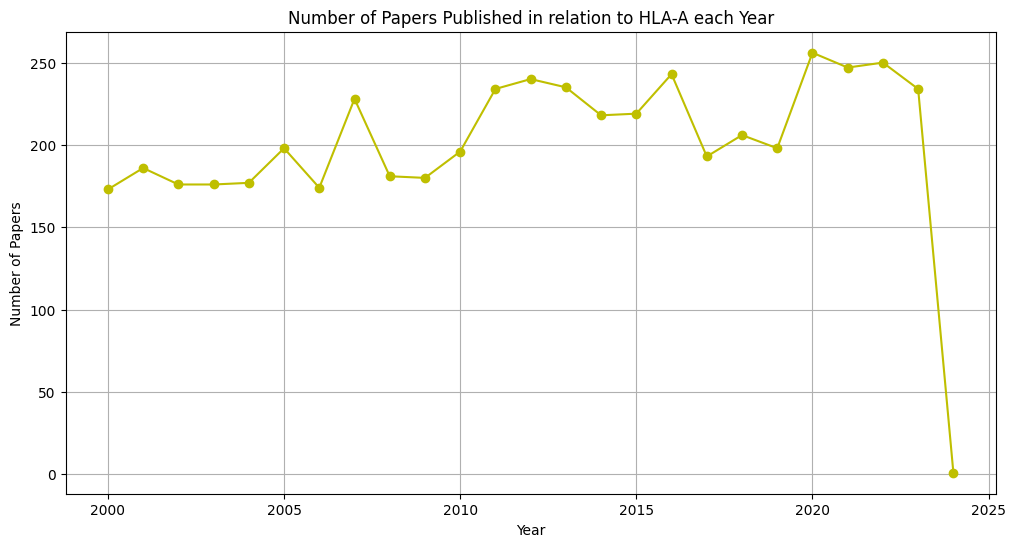

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(papers_published_per_year['index'], papers_published_per_year['Year'], marker='o', linestyle='-', color='y')
plt.title('Number of Papers Published in relation to HLA-A each Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()

Finding the top authors using the Author dataframe by FullName and publication count

In [31]:
# Counting publications for each author considering their FullName
full_name_publication_counts = authors_df.groupby(['FullName']).size().reset_index(name='PublicationCount')

# Sorting the authors based on their publication count from the year 2000-2024
Publication_counts = full_name_publication_counts.sort_values(by='PublicationCount', ascending=False)
Publication_trend_top_20= Publication_counts.head(20)
Publication_trend_top_20

,FullName,PublicationCount
18753,P Y Lin PY,58
12290,K L Yang KL,54
11980,Julio Granados J,41
13329,Kuo-Liang Yang KL,39
6436,Esteban Arrieta-Bolaños E,38
20503,Rodrigo Barquera R,37
5924,Edmond J Yunis EJ,37
19465,Py-Yu Lin PY,37
26229,Yasuo Morishima Y,36
11375,Joaquín Zúñiga J,35


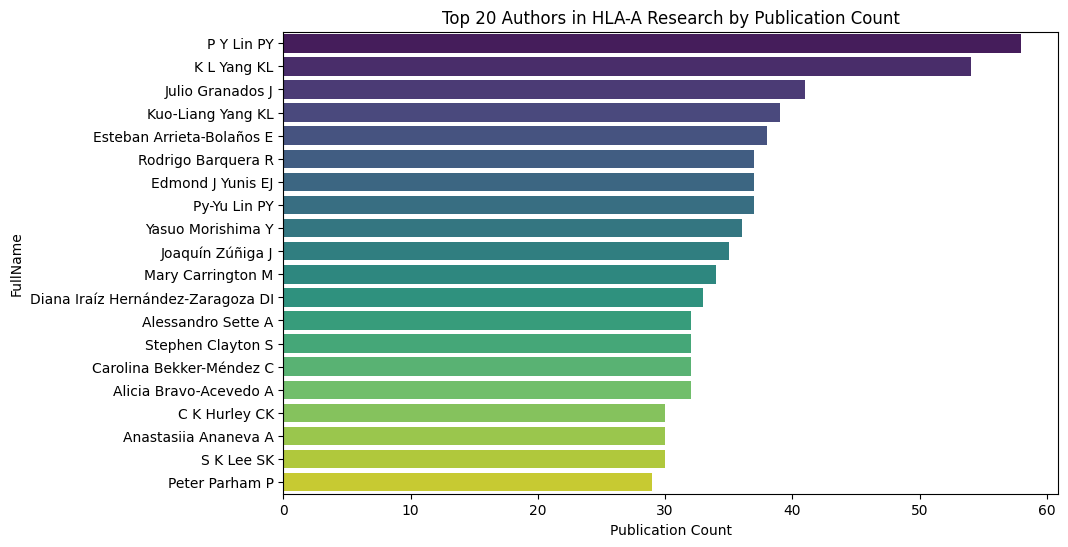

In [32]:
#importing seaborn for the visualisation#
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='PublicationCount', y='FullName', hue='FullName', data= Publication_trend_top_20, palette='viridis')
plt.title('Top 20 Authors in HLA-A Research by Publication Count')
plt.xlabel('Publication Count')
plt.show()